In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#we will drop the varible model because its variabilty can be explained by other crucial inputs like brand,year

In [6]:
data = raw_data.drop(['Model'],axis=1)

In [7]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
# To check for missing values

In [9]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
# Remove missing values

In [11]:
data_no_mv = data.dropna(axis=0)

In [12]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [13]:
# ploting the distribution of each varible

C:\Users\pc\AppData\Local\Temp\ipykernel_9152\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

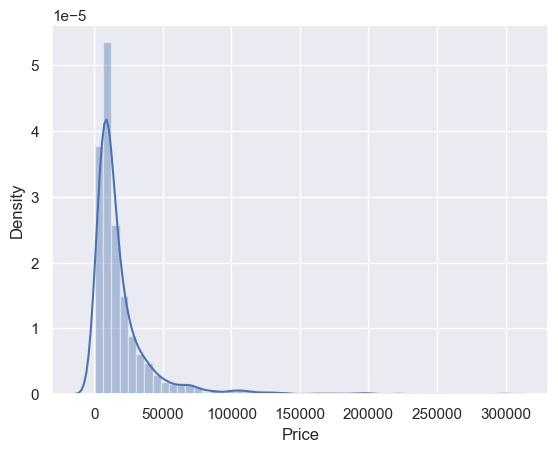

In [14]:
sns.distplot(data_no_mv['Price'])

In [15]:
# Removing outlier from price

In [16]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\pc\AppData\Local\Temp\ipykernel_9152\1547815769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

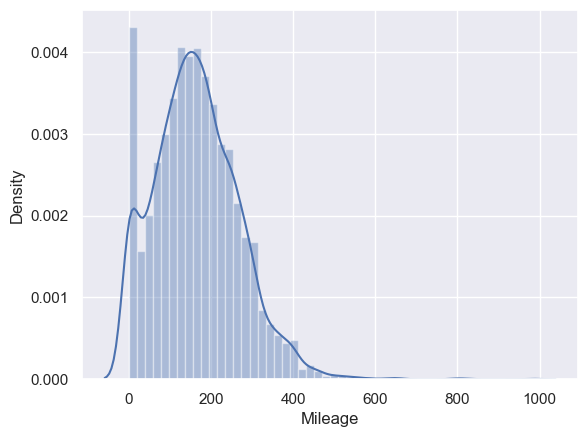

In [17]:
sns.distplot(data_1['Mileage'])

C:\Users\pc\AppData\Local\Temp\ipykernel_9152\2956412240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

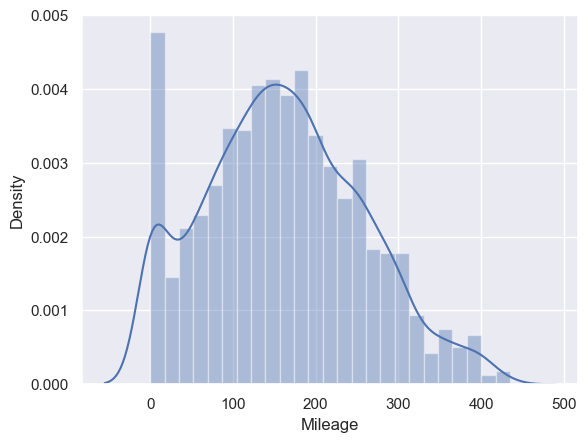

In [18]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])  

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


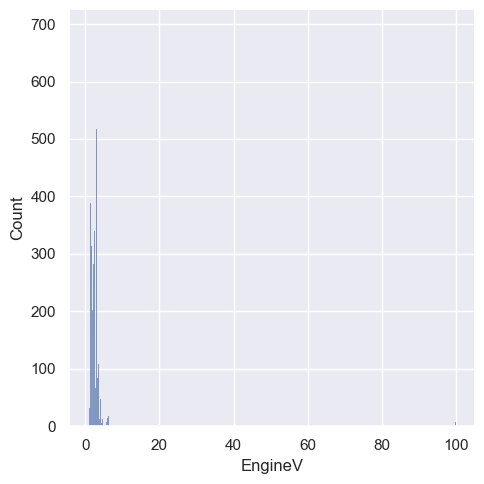

In [19]:
sns.displot(data_no_mv['EngineV'])

C:\Users\pc\AppData\Local\Temp\ipykernel_9152\3404246461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

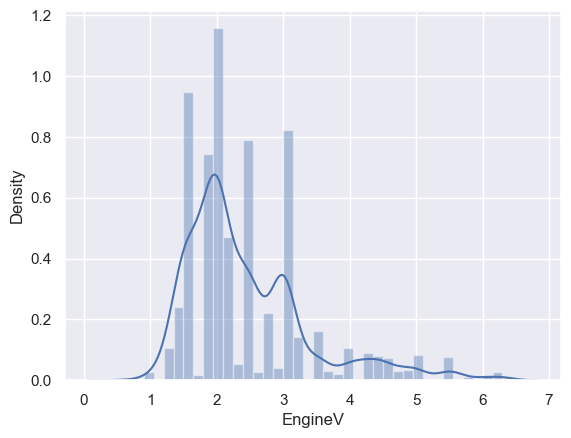

In [20]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

C:\Users\pc\AppData\Local\Temp\ipykernel_9152\534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

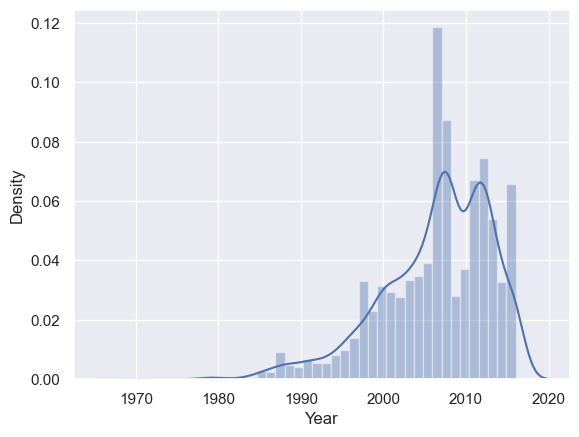

In [21]:
sns.distplot(data_no_mv['Year'])

C:\Users\pc\AppData\Local\Temp\ipykernel_9152\3029883836.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

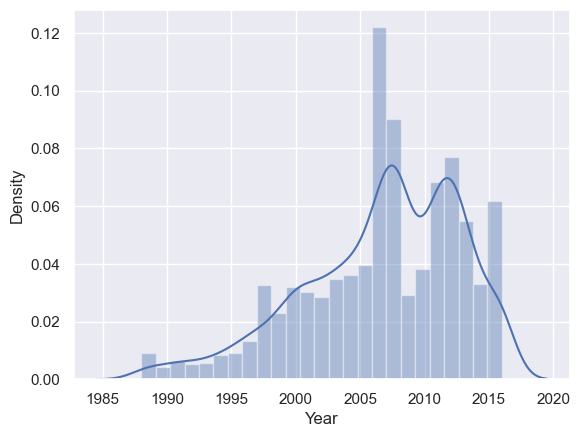

In [22]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [23]:
data_cleaned = data_4.reset_index(drop=True)

In [24]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [25]:
# After finishing with pre-processing the data, we move to checking OLS assumptions

In [26]:
# Firstly we check for linearity using a scatter plot

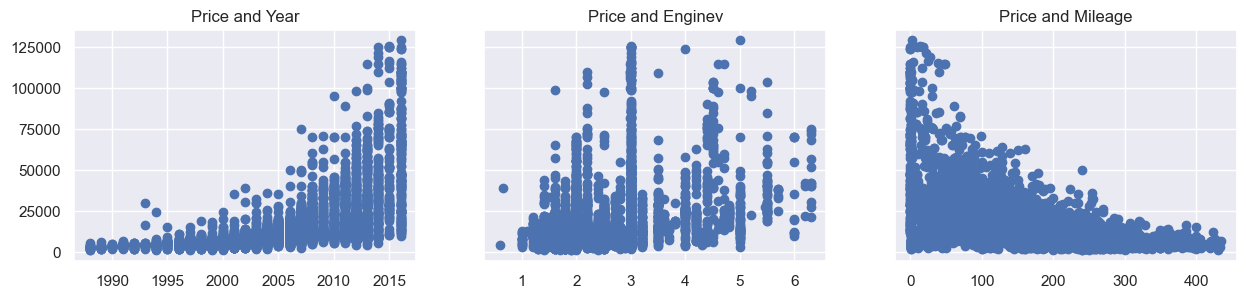

In [27]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and Enginev')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [28]:
# From the above plots it is obvious that the distributions are not linear

In [29]:
log_price = np.log(data_cleaned['Price'])

In [30]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


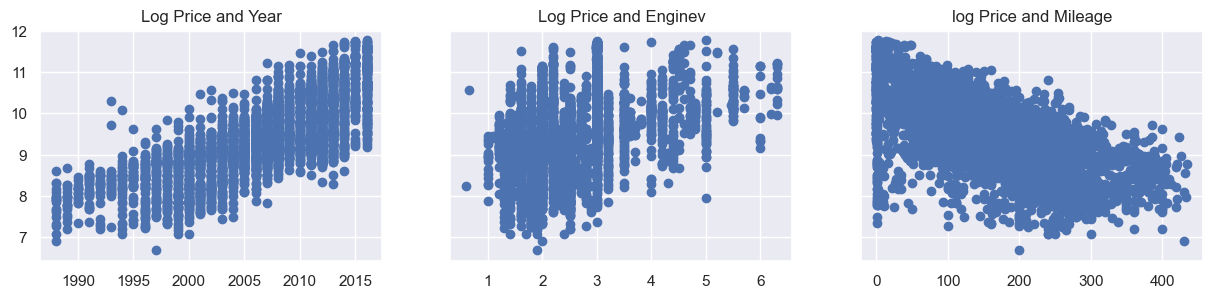

In [31]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and Enginev')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log Price and Mileage')

plt.show()

In [32]:
# Secondily we will check for muiticollinearity using statsmodels

In [33]:
data_cleaned 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


In [34]:
data_cleaned.drop(['Price'],axis=1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [36]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [37]:
data_no_mc = data_cleaned.drop(['Year'],axis=1)

In [38]:
data_no_mc

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


In [39]:
# Converting categorical data into numerical creating dummy variables

In [40]:
data_with_dummies = pd.get_dummies(data_no_mc,drop_first=True,dtype=int)

In [41]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [43]:
vif

,VIF,features
0,5.657734,Price
1,6.746660,Mileage
2,13.724985,EngineV
3,57.162447,log_price
4,2.606159,Brand_BMW
5,3.084558,Brand_Mercedes-Benz
6,1.933275,Brand_Mitsubishi
7,2.403738,Brand_Renault
8,2.476661,Brand_Toyota
9,3.414271,Brand_Volkswagen


In [44]:
 data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [45]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [46]:
data_p = data_with_dummies[cols]

In [47]:
data_p.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [48]:
targets = data_p['log_price']
inputs = data_p.drop(['log_price'],axis=1)

In [49]:
# Standardize the data

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [51]:
inputs_scaled = scaler.transform(inputs)

In [52]:
# Spliting Traning And Testing data

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [54]:
reg = LinearRegression()
reg.fit(x_train, y_train)
# With this line of code we have create a regression of the data

LinearRegression()

In [55]:
y_hat = reg.predict(x_train)
# We are storing  our prediction in yhat variable

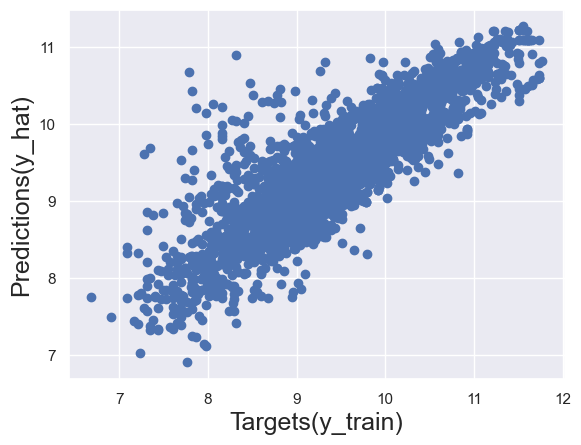

In [56]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions(y_hat)', size=18)
plt.show()
# This show the relationship between the target ie our inputs data and the Predictions which is our model we can see that it
# does not predict the lower prices properly as the point as scatter away from 45 degree line across the plot ideally we want
# each point on the y-axis to match directly on the x-axis.

C:\Users\pc\AppData\Local\Temp\ipykernel_9152\111686519.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Diffrence PDF')

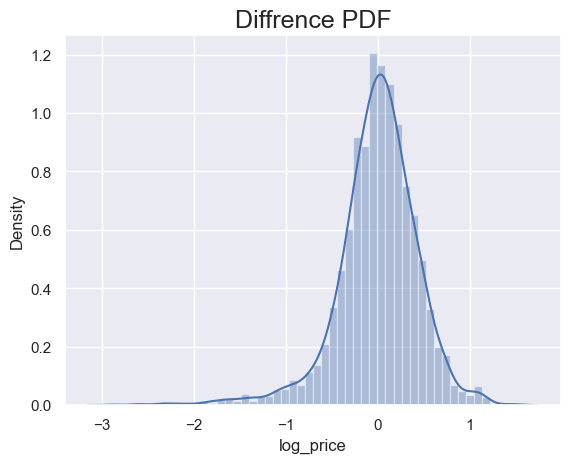

In [57]:
# Another way to show the acuracy of our model is to show the distribution of the standard error
sns.distplot(y_train - y_hat)
plt.title('Diffrence PDF', size = 18)

In [58]:
# From the distribution it matches our expectation because it follows a normal distribution except for the tail of the
# Negative side.


In [59]:
reg.score(x_train, y_train)

0.744996578792662

In [60]:
# This is the R-square value which explain the that our model predicts 75% of the variability of the data

In [61]:
reg.intercept_

9.415239458021299

In [62]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [63]:
reg_summarry = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summarry['Weight'] = reg.coef_

In [64]:
reg_summarry

,Features,Weight
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [65]:
# from this we can say that the bigger the feature, the bigger the impact also note that the dummy variable like Brand_Toyota
# do not carry the same weight as features as the compared in relation to the Benchmark.

In [66]:
y_hat_test = reg.predict(x_test)

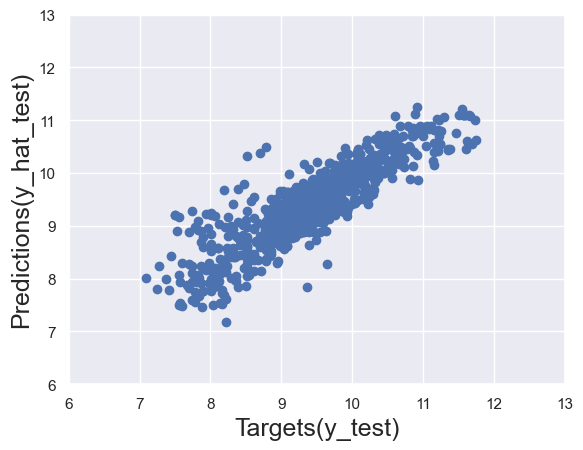

In [67]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets(y_test)', size=18)
plt.ylabel('Predictions(y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [74]:
pred= pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
pred.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [75]:
y_test = y_test.reset_index(drop=True)
pred['Target'] = np.exp(y_test)

In [76]:
pred.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [77]:
pred['Residual'] = pred['Target'] - pred['Predictions']
# This show the standard error of the model

In [78]:
pred.head()

,Predictions,Target,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075


In [86]:
pred['Difference %'] = np.absolute(pred['Residual']/pred['Target']*100)
# This shows the standard error in terms of percentage.

In [87]:
pred.describe()

,Predictions,Target,Residual,Diffrence %,Difference %
count,774.000000,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080,512.688080


In [81]:
# From the descritive statistic we can see that min diffrence % show that the prediction is close to the target, but is very
# far off when we compare the max, what this means is our model does not predict car with lower prices very well


In [85]:
pred.sort_values(by=['Difference %'])

,Predictions,Target,Residual,Diffrence %
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279


In [89]:
pd.options.display.max_rows = 999
pred.sort_values(by=['Difference %'])

,Predictions,Target,Residual,Diffrence %,Difference %
698,30480.847838,30500.00,19.152162,0.062794,0.062794
742,16960.310476,16999.00,38.689524,0.227599,0.227599
60,12469.207487,12500.00,30.792513,0.246340,0.246340
110,25614.137960,25500.00,-114.137960,0.447600,0.447600
367,42703.676996,42500.00,-203.676996,0.479240,0.479240
369,3084.687839,3100.00,15.312161,0.493941,0.493941
769,29651.726363,29500.00,-151.726363,0.514327,0.514327
272,9749.525108,9800.00,50.474892,0.515050,0.515050
714,23118.072456,22999.00,-119.072456,0.517729,0.517729
630,8734.578436,8800.00,65.421564,0.743427,0.743427


In [91]:
# we conclude that the model does not predict cars with lower prices very well